In [28]:
#Exercise 2:

! pip install sympy
! pip install numpy 
! pip install scipy
! pip install matplotlib
! pip install random
import matplotlib.pyplot as plt
from scipy.optimize import minimize
import numpy as np
import time
import random as r
import sympy as sp
from sympy import symbols

ERROR: Could not find a version that satisfies the requirement random (from versions: none)
ERROR: No matching distribution found for random


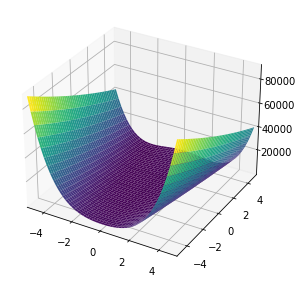

In [60]:

#Case of The Banana (Rosenbrock) Function
#The gradient descent approach will be used to  minimise the function

from sympy.plotting import plot3d
x1 , x2 = symbols ( 'x1 , x2' )
f1 = 100*(x2 - x1**2)**2 + (1 - x1)**2
plot3d ( f1 , (x1 , -5 ,5) ,(x2 , -5,5) )

--- time used for function call in Run 1 is 0.02607870101928711 seconds ---
the run's number: 1
the starting point is: [ 1.66250252 -0.90712071]
the number of iterations is: 34
the optimal points are: [1.00000021 1.00000042]
the optimal  value is 0.000000


--- time used for function call in Run 2 is 0.02586817741394043 seconds ---
the run's number: 2
the starting point is: [ 1.34471794 -2.61502665]
the number of iterations is: 30
the optimal points are: [0.99999996 0.99999992]
the optimal  value is 0.000000


--- time used for function call in Run 3 is 0.02088785171508789 seconds ---
the run's number: 3
the starting point is: [ 1.49774056 -3.51780251]
the number of iterations is: 26
the optimal points are: [0.99999995 0.9999999 ]
the optimal  value is 0.000000


--- time used for function call in Run 4 is 0.029264211654663086 seconds ---
the run's number: 4
the starting point is: [-3.15569399 -0.41769905]
the number of iterations is: 57
the optimal points are: [0.99999998 0.99999996]


/opt/miniconda3/envs/conda_env/lib/python3.7/site-packages/ipykernel_launcher.py:37: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/opt/miniconda3/envs/conda_env/lib/python3.7/site-packages/ipykernel_launcher.py:48: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


--- time used for function call in Run 6 is 0.02608013153076172 seconds ---
the run's number: 6
the starting point is: [1.22956255 2.46509778]
the number of iterations is: 20
the optimal points are: [0.99999997 0.99999993]
the optimal  value is 0.000000


--- time used for function call in Run 7 is 0.025845766067504883 seconds ---
the run's number: 7
the starting point is: [ 2.36148569 -2.64056721]
the number of iterations is: 41
the optimal points are: [1.00000002 1.00000003]
the optimal  value is 0.000000


--- time used for function call in Run 8 is 0.023450374603271484 seconds ---
the run's number: 8
the starting point is: [-1.18806422  1.04054283]
the number of iterations is: 35
the optimal points are: [1. 1.]
the optimal  value is 0.000000


--- time used for function call in Run 9 is 0.04560446739196777 seconds ---
the run's number: 9
the starting point is: [-1.66251644 -2.82015772]
the number of iterations is: 55
the optimal points are: [0.99999999 0.99999998]
the optimal  valu

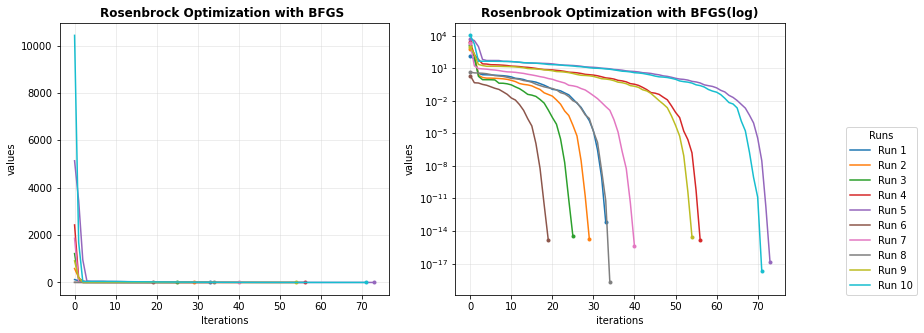

In [67]:

def rosenbrock(X):  #cost function
    """Rosenbrock Equation"""
    x1=X[0]
    x2=X[1]
    return 100.0*(x2-x1**2.0)**2 + (1-x1)**2

def rosenbrock_gradient(X):#gradient function
    """Partial  derivatives of the Rosenbrock Equation."""
    x1=X[0]
    x2=X[1]
    dfx1=(-400*x1*x2) + (400*x1**3) + (2*x1 -2) #partial  derivative with respect to X1
    dfx2=200*x2 -200*x1**2 #partialderivative with respect to  X2
    return np.array([dfx1,dfx2])
def result(p):
    """Tracing the states of optimization."""
    global ps
    ps.append(rosenbrock(p))
    return ps

# Optimising and Plotting 
fig=plt.figure(figsize=(13,5))
for i in range(10):
        Random_start=np.array([np.random.uniform(-4,4),np.random.uniform(-4,4)])
        ps=[]
        start_time = time.time()
        random.seed(250)
        optimized_rosenbrock= minimize(rosenbrock,Random_start,method="BFGS", jac=rosenbrock_gradient, callback=result)
        print(f"--- time used for function call in Run {i+1} is %s seconds ---" % (time.time() - start_time))
        print("the run's number:",i+1)
        print("the starting point is:",Random_start)
        print("the number of iterations is:",optimized_rosenbrock.nit)
        print("the optimal points are:",optimized_rosenbrock.x)
        print("the optimal  value is %.6f"%optimized_rosenbrock.fun)
        print("\n")
        
        rosebfgs=fig.add_subplot(121)
        rosebfgs.set_title("Rosenbrock Optimization with BFGS ",fontweight="bold")
        rosebfgs.set_ylabel("values")
        rosebfgs.set_xlabel("Iterations")
        rosebfgs.grid(color='lightgray', alpha=0.7)
        rosebfgs.plot(ps,marker='', label=f"Run {i+1}")
        rosebfgs.plot(0,ps[0],marker='', color=plt.gca().lines[-1].get_color())
        rosebfgs.plot(len(ps)-1,ps[-1],marker='.',color=plt.gca().lines[-1].get_color())
        rosebfgs.grid(color='lightgray', alpha=0.5)
        
        #setting parameters for log plot
        log_rosebfgs=fig.add_subplot(122)
        log_rosebfgs.grid(color='lightgray', alpha=0.5)
        log_rosebfgs.set_title("Rosenbrook Optimization with BFGS(log)",fontweight="bold")
        log_rosebfgs.set_ylabel("values")
        log_rosebfgs.set_xlabel("iterations")
        log_rosebfgs.plot(ps,marker='', label=f"Run {i+1}")
        log_rosebfgs.plot(0,ps[0],marker='.', color=plt.gca().lines[-1].get_color())
        log_rosebfgs.plot(len(ps)-1,ps[-1],marker='.',color=plt.gca().lines[-1].get_color())
        log_rosebfgs.set_yscale('log')
        log_rosebfgs.legend(loc="lower right",bbox_to_anchor=(1.40,-0.0),borderaxespad=0., ncol=1, title="Runs")


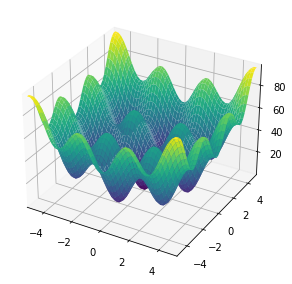

In [61]:
#Case of eggcrate function
#The gradient descent approach will be used to  minimise the function
x , y = symbols ( 'x , y' )
f2 = x**2 + y**2 + 25*(sp.sin(x)**2 + sp.sin(y)**2)
plot3d ( f2 , (x , -5 ,5) ,(y, -5,5) )

the run's number is: 1
the starting point is: [-4.13925234 -5.9932668 ]
--- time used for function call in run 1 is 0.007659912109375 seconds ---
it took 7 iterations
the optimal points are: [-3.01960188 -6.03142402]
the optimal  value is:47.417669
Optimization terminated successfully.


the run's number is: 2
the starting point is: [ 0.64868558 -0.72541048]
--- time used for function call in run 2 is 0.0062885284423828125 seconds ---
it took 5 iterations
the optimal points are: [-3.92466624e-08 -1.14949864e-07]
the optimal  value is:0.000000
Optimization terminated successfully.


the run's number is: 3
the starting point is: [4.39006606 2.42564939]
--- time used for function call in run 3 is 0.006117582321166992 seconds ---
it took 7 iterations
the optimal points are: [3.01960187 3.01960187]
the optimal  value is:18.976395
Optimization terminated successfully.


the run's number is: 4
the starting point is: [ 5.58882228 -2.95615944]
--- time used for function call in run 4 is 0.01380

/opt/miniconda3/envs/conda_env/lib/python3.7/site-packages/ipykernel_launcher.py:40: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/opt/miniconda3/envs/conda_env/lib/python3.7/site-packages/ipykernel_launcher.py:51: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


the run's number is: 6
the starting point is: [0.6891563  5.75093381]
--- time used for function call in run 6 is 0.013371944427490234 seconds ---
it took 7 iterations
the optimal points are: [8.02955849e-09 6.03142401e+00]
the optimal  value is:37.929472
Optimization terminated successfully.


the run's number is: 7
the starting point is: [-5.56695809 -0.63792794]
--- time used for function call in run 7 is 0.010630369186401367 seconds ---
it took 8 iterations
the optimal points are: [-6.03142401e+00  3.85023245e-10]
the optimal  value is:37.929472
Optimization terminated successfully.


the run's number is: 8
the starting point is: [ 4.53745943 -5.02133461]
--- time used for function call in run 8 is 0.0076673030853271484 seconds ---
it took 6 iterations
the optimal points are: [-3.57050750e-10 -6.03142401e+00]
the optimal  value is:37.929472
Optimization terminated successfully.


the run's number is: 9
the starting point is: [2.68352678 3.89065855]
--- time used for function call i

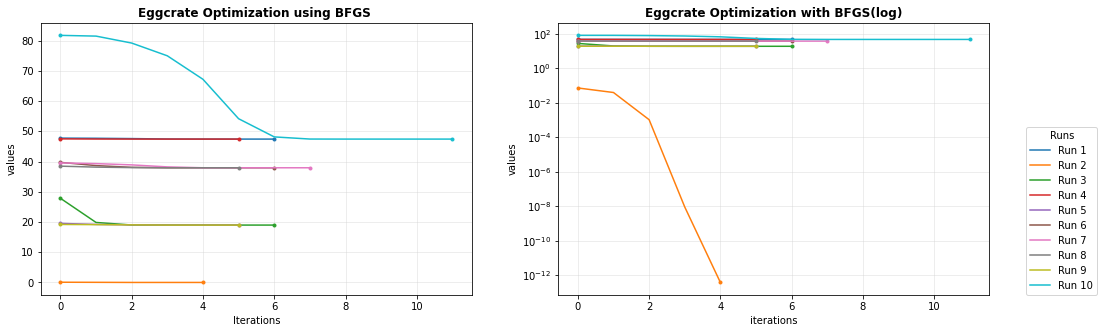

In [59]:

def eggcrate(X):  #cost function
    """ Eggcrate function"""
    x=X[0]
    y=X[1]
    return x**2 + y**2 + 25*(np.sin(x)**2 + np.sin(y)**2)

def eggcrate_gradient(X):#gradient function
    """ Partial  derivatives of the Eggcrate Equation."""
    x=X[0]
    y=X[1]
    fdx= 2*x + 25*(2*np.sin(x)*np.cos(x))#partial  derivative with respect to x
    fdy=2*y +25*(2*np.sin(y)*np.cos(y)) #partial derivative with respect to  y
    return np.array([fdx,fdy])

es=[]
def tracker(e):
    """Tracing the states of optimization."""
    global es
    es.append(eggcrate(e))
    return es

# Optimising and Plotting 
fig=plt.figure(figsize=(17,5))

for i in range(10):
        r.seed(250)
        Random_start1=np.array([np.random.uniform(-2*np.pi, 2*np.pi,),np.random.uniform(-2*np.pi, 2*np.pi,)])
        print("the run's number is:",i+1)
        print("the starting point is:",Random_start1)
        es=[]
        start_time1 = time.time()
        optimized_eggcrate= minimize(eggcrate,Random_start1,method="BFGS", jac=eggcrate_gradient, callback=tracker)
        print(f"--- time used for function call in run {i+1} is %s seconds ---" % (time.time() - start_time1))
        print("it took",optimized_eggcrate.nit,"iterations")
        print("the optimal points are:",optimized_eggcrate.x)
        print("the optimal  value is:%.6f"%optimized_eggcrate.fun)
        print(optimized_eggcrate.message)
        print("\n")
        eggbfgs=fig.add_subplot(121)
        eggbfgs.set_title("Eggcrate Optimization using BFGS ",fontweight="bold")
        eggbfgs.set_ylabel("values")
        eggbfgs.set_xlabel("Iterations")
        eggbfgs.grid(color='lightgray', alpha=0.7)
        eggbfgs.plot(es,marker='', label=f"Run {i+1}")
        eggbfgs.plot(0,es[0],marker='.', color=plt.gca().lines[-1].get_color())
        eggbfgs.plot(len(es)-1,es[-1],marker='.',color=plt.gca().lines[-1].get_color())
        eggbfgs.grid(color='lightgray', alpha=0.5)
        
        #setting parameters for log plot
        log_eggbfgs=fig.add_subplot(122)
        log_eggbfgs.grid(color='lightgray', alpha=0.5)
        log_eggbfgs.set_title("Eggcrate Optimization with BFGS(log)",fontweight="bold")
        log_eggbfgs.set_ylabel("values")
        log_eggbfgs.set_xlabel("iterations")
        log_eggbfgs.plot(es,marker='', label=f"Run {i+1}")
        log_eggbfgs.plot(0,es[0],marker='.', color=plt.gca().lines[-1].get_color())
        log_eggbfgs.plot(len(es)-1,es[-1],marker='.',color=plt.gca().lines[-1].get_color())
        log_eggbfgs.set_yscale('log')
        log_eggbfgs.legend(loc="lower right",bbox_to_anchor=(1.25,-0.0),borderaxespad=0., ncol=1, title="Runs")
        


the run's number1:
the starting point is:[2.7551,  0.7436, 21.1665, 7.3794, 8.0887, 2.9018, 5.2142]
the number of iterations is: 11
the optimal points are:[3.5000,  0.7000, 17.0000, 7.3000, 7.7153, 3.3502, 5.2867]
the optimal  value is:2994.3516
Optimization terminated successfully
--- time used for function call in run is 0.20740818977355957 seconds ---




/opt/miniconda3/envs/conda_env/lib/python3.7/site-packages/ipykernel_launcher.py:80: OptimizeWarning: Unknown solver options: full_output


the run's number2:
the starting point is:[3.3695,  0.8088, 25.0352, 7.9858, 8.0607, 3.1946, 5.4470]
the number of iterations is: 8
the optimal points are:[3.5000,  0.7000, 17.0000, 7.3000, 7.7153, 3.3502, 5.2867]
the optimal  value is:2994.3543
Optimization terminated successfully
--- time used for function call in run is 0.09480667114257812 seconds ---


the run's number3:
the starting point is:[3.4303,  0.7682, 19.6928, 7.3937, 7.3078, 3.3007, 5.5022]
the number of iterations is: 5
the optimal points are:[3.5000,  0.7000, 17.0000, 7.3000, 7.7153, 3.3502, 5.2867]
the optimal  value is:2994.3551
Optimization terminated successfully
--- time used for function call in run is 0.06661629676818848 seconds ---




/opt/miniconda3/envs/conda_env/lib/python3.7/site-packages/ipykernel_launcher.py:93: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/opt/miniconda3/envs/conda_env/lib/python3.7/site-packages/ipykernel_launcher.py:104: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


the run's number4:
the starting point is:[2.8209,  0.7467, 22.2140, 7.9013, 7.7479, 3.8998, 5.5598]
the number of iterations is: 10
the optimal points are:[3.5000,  0.7000, 17.0000, 7.3000, 7.7153, 3.3502, 5.2867]
the optimal  value is:2994.3549
Optimization terminated successfully
--- time used for function call in run is 0.20556139945983887 seconds ---


the run's number5:
the starting point is:[3.0868,  0.7663, 19.6152, 7.7766, 8.0903, 3.8417, 5.8043]
the number of iterations is: 9
the optimal points are:[3.5000,  0.7000, 17.0000, 7.3000, 7.7153, 3.3502, 5.2867]
the optimal  value is:2994.3576
Optimization terminated successfully
--- time used for function call in run is 0.08818697929382324 seconds ---


the run's number6:
the starting point is:[2.8003,  0.7415, 20.2288, 7.8916, 8.1696, 3.7621, 5.5744]
the number of iterations is: 8
the optimal points are:[3.5000,  0.7000, 17.0000, 7.3000, 7.7153, 3.3502, 5.2867]
the optimal  value is:2994.3458
Positive directional derivative for li

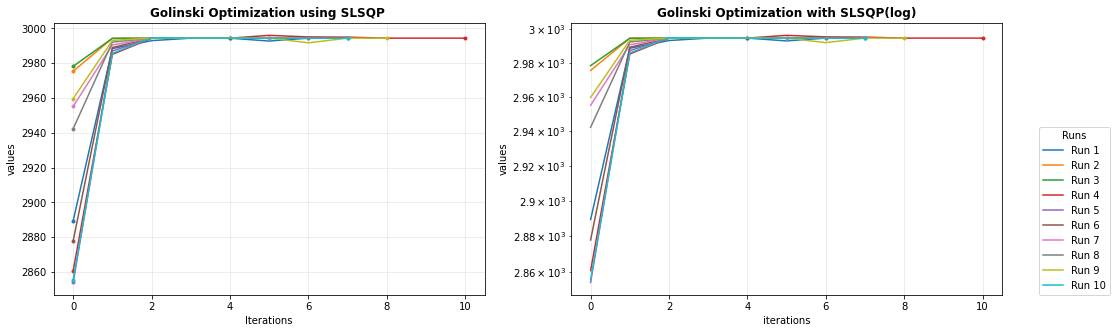

In [66]:
#Case of Golinski. 
#The SLSQP solver was used

def Golinski(X):
    """ Cost Function"""
    x1=X[0]
    x2=X[1]
    x3=X[2]
    x4=X[3]
    x5=X[4]
    x6=X[5]
    x7=X[6]
    Gol=0.7854*(x1*x2**2)*(3.3333*x3**2+14.9334*x3-43.0934)      -1.5079*x1*(x6**2+x7**2)+7.477*(x6**3+x7**3)      +0.7854*(x4*x6**2+x5*x7**2)
    return Gol

#the following functions cons1 to cons11 are the constraints 
def cons1(X): 
    return 1-(27/(X[0]*X[1]**2*X[2]))
def cons2(X):
    return 1-(397.5/(X[0]*X[1]**2*X[2]**2))
def cons3(X):
    return 1-(1.93*X[3]**3/(X[1]*X[2]*X[5]**4))
def cons4(X):
    return 1-(1.93*X[4]**3/(X[1]*X[2]*X[6]**4))
def cons5(X):
    return 1-(np.sqrt((745*X[3]/(X[1]*X[2]))**2 + 16.9*10**6)/(110.0*X[5]**3))
def cons6(X):
    return 1-(np.sqrt((745*X[4]/(X[1]*X[2]))**2+157.5*10**6)/(85.0*X[6]**3))
def cons7(X):
    return 1-(X[1]*X[2]/40)
def cons8(X):
    return 1-(5*X[1]/X[0])
def cons9(X):
    return 1-(X[0]/(12*X[1]))
def cons10(X):
    return 1-((1.5*X[5]+1.9)/X[3])
def cons11(X):
    return 1-((1.1*X[6]+1.9)/X[4])

bound=np.array([[2.6,3.6],[0.7,0.8],[17.0,28.0],[7.3,8.3],[7.3,8.3],[2.9,3.9],[5.0,5.9]]) #bounds for each decision variable x1 to x7

cons=({'type':'ineq',  'fun':  cons1},
      {'type':'ineq',  'fun':  cons2},
      {'type':'ineq',  'fun':  cons3},
      {'type':'ineq',  'fun':  cons4},
      {'type':'ineq',  'fun':  cons5},
      {'type':'ineq',  'fun':  cons6},
      {'type':'ineq',  'fun':  cons7},
      {'type':'ineq',  'fun':  cons8},
      {'type':'ineq',  'fun':  cons9},
      {'type':'ineq',  'fun':  cons10},
      {'type':'ineq',  'fun':  cons11})


#tracing the results of the SLSQP
def golinski_tracker(X):
    global Nfeval
    Nfeval=1
    global funcvals
    funcvals.append(Golinski(X))
    Nfeval += 1
    return funcvals
    
# Optimising and Plotting 
fig=plt.figure(figsize=(17,5))
for i in range(10):
        funcvals = []      # funcvals array for each run
       
        Xo=np.array([np.random.uniform(2.6,3.61),np.random.uniform(0.7,0.81),np.random.uniform(17.0,28.0),
                np.random.uniform(7.3,8.31),np.random.uniform(7.3,8.31),np.random.uniform(2.9,3.9),
                np.random.uniform(5.0,5.91)])
        print(f"the run's number{i+1}:")
        print("the starting point is:[{0:3.4f}, {1: 3.4f},{2: 3.4f},{3: 3.4f},{4: 3.4f},{5: 3.4f},{6: 3.4f}]"
              .format(Xo[0],Xo[1],Xo[2],Xo[3],Xo[4],Xo[5],Xo[6]))
        
    # defining the global variables so as to change them in local scope
        #funcvals.append(Golinski(Xo))
        start_time=time.time()
        GoSolution = minimize(Golinski, Xo, bounds=bound, constraints=cons,
                       callback=golinski_tracker, method='SLSQP',options={'disp':False,'full_output':True})
        funcvals.append(Golinski(GoSolution.x))
        end_time=time.time()
        
        print("the number of iterations is:",GoSolution.nit)
        print("the optimal points are:[{0:3.4f}, {1: 3.4f},{2: 3.4f},{3: 3.4f},{4: 3.4f},{5: 3.4f},{6: 3.4f}]"
              .format(GoSolution.x[0],GoSolution.x[1],GoSolution.x[2],GoSolution.x[3],GoSolution.x[4],GoSolution.x[5],GoSolution.x[6]))
        print("the optimal  value is:%.4f"%GoSolution.fun)
        print(GoSolution.message)
        print("--- time used for function call in run is %s seconds ---" % (end_time- start_time))
        print("\n")

    # Plot the graph for each run on single canvas (figure)
        ax1=fig.add_subplot(121)
        ax1.set_title("Golinski Optimization using SLSQP ",fontweight="bold")
        ax1.set_ylabel("values")
        ax1.set_xlabel("Iterations")
        ax1.grid(color='lightgray', alpha=0.7)
        ax1.plot(funcvals,marker='', label=f"Run {i+1}")
        ax1.plot(0,funcvals[0],marker='.', color=plt.gca().lines[-1].get_color())
        ax1.plot(len(funcvals)-1,funcvals[-1],marker='.',color=plt.gca().lines[-1].get_color())
        ax1.grid(color='lightgray', alpha=0.5)
        
    #setting parameters for log plot    
        ax2=fig.add_subplot(122)
        ax2.grid(color='lightgray', alpha=0.5)
        ax2.set_title("Golinski Optimization with SLSQP(log)",fontweight="bold")
        ax2.set_ylabel("values")
        ax2.set_xlabel("iterations")
        ax2.plot(funcvals,marker='', label=f"Run {i+1}")
        ax2.plot(0,funcvals[0],marker='', color=plt.gca().lines[-1].get_color())
        ax2.plot(len(funcvals)-1,funcvals[-1],marker='.',color=plt.gca().lines[-1].get_color())
        ax2.set_yscale('log')
        ax2.legend(loc="lower right",bbox_to_anchor=(1.25,-0.0),borderaxespad=0., ncol=1, title="Runs")   
  
